This is the background work and documentation of the "Language Recognition" project for CS3120. This serves mainly as an explanation as well as a document for me to look back on.
Special thanks to the following for collecting datasets used within this project.
- https://github.com/adbar/German-NLP/blob/master/README.md
- https://www.merlin-platform.eu/
This project looks at words in the German language and will give an estimate on fluency.

# Part 1: Dataset Preparation.
There are multiple datasets that will be used in this project. They are located in /TrainingData. They will each need to be extracted in order to get the appropriate information. 

In [3]:
import csv
import re
import os

def extract_metadata(text):
    # Define patterns for each metadata field
    patterns = {
        "Test language": r"Test language: (.+)",
        "CEFR level of test": r"CEFR level of test: (.+)",
        "Mother tongue": r"Mother tongue: (.+)",
        "Overall CEFR rating": r"Overall CEFR rating: (.+)",
        "Grammatical accuracy": r"Grammatical accuracy: (.+)",
        "Orthography": r"Orthography: (.+)",
        "Vocabulary range": r"Vocabulary range: (.+)",
        "Vocabulary control": r"Vocabulary control: (.+)",
        "Coherence/Cohesion": r"Coherence/Cohesion: (.+)",
        "Sociolinguistic appropriateness": r"Sociolinguistic appropriateness: (.+)",
        "Learner text": r"Learner text:\s+([\s\S]+?)$"  # Match all text after "Learner text:"
    }
    
    extracted_data = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text, re.MULTILINE)
        extracted_data[key] = match.group(1).strip() if match else ""
    return extracted_data

def process_folder(input_folder, output_file):
    # List all .txt files in the folder
    files = [f for f in os.listdir(input_folder) if f.endswith('.txt')]
    if not files:
        print("No .txt files found in the specified folder.")
        return

    # Process each file and collect data
    all_data = []
    for file in files:
        file_path = os.path.join(input_folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
        metadata = extract_metadata(text)
        metadata['Filename'] = file  # Add filename for reference
        all_data.append(metadata)
    
    # Write all data to a single CSV
    with open(output_file, mode='w', newline='', encoding='utf-8') as csvfile:
        fieldnames = list(all_data[0].keys())  # Use keys from the first entry
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(all_data)

    print(f"Data from {len(files)} files extracted and written to {output_file}")

def main():
    input_folder = "TrainingData"  # Containing .txt files
    output_file = "trainingParsed.csv"     # Desired output CSV file

    process_folder(input_folder, output_file)

if __name__ == "__main__":
    main()


Data from 1033 files extracted and written to trainingParsed.csv


In [4]:
import pandas as pd

df = pd.read_csv('trainingParsed.csv')
df.head()

,Test language,CEFR level of test,Mother tongue,Overall CEFR rating,Grammatical accuracy,Orthography,Vocabulary range,Vocabulary control,Coherence/Cohesion,Sociolinguistic appropriateness,Learner text,Filename
0,German,C1,Russian,B2,B2,C1,C1,C1,C1,B2,"Ich begrüße alle, der sich für das Thema „Länd...",1031_0001950.txt
1,German,A2,Russian,A2,B1,B2,B1,B1,B2,B2,"Sehr geehrt Frau Schmidt, ich bin ein paar Tag...",1091_0000062.txt
2,German,A2,not reported,B1,B1,B2,B1,B1,B1,B1,Liebe Julia,1091_0000002.txt
3,German,C1,Spanish,B2,B1,B2,B2,B2,B2,B2,"Meine Meinung nach ist sinnlos, auch in Auslan...",1031_0002083.txt
4,German,B1,Portuguese,A2,A2,B1,B1,A2,A2,A2,"Stadt X, 24.02.2012",1061_0120323.txt


In [5]:
df.describe()

,Test language,CEFR level of test,Mother tongue,Overall CEFR rating,Grammatical accuracy,Orthography,Vocabulary range,Vocabulary control,Coherence/Cohesion,Sociolinguistic appropriateness,Learner text,Filename
count,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
unique,1,5,15,6,7,7,7,7,7,7,744,1033
top,German,B1,not reported,B1,B1,B2,B1,B1,B1,B2,"Lieber Jens,",1091_0000050.txt
freq,1033,210,275,331,352,338,349,321,356,347,20,1


# 1.1 Reading and understanding the data

In [15]:
import seaborn as sns
# sns.scatterplot(data=df, x='CEFR level of test', y='Overall CEFR rating') # No Correlation
# sns.scatterplot(data=df, x='Vocabulary range', y='Overall CEFR rating') # No Correlation


In [12]:
df.groupby('Overall CEFR rating').size()


Overall CEFR rating
A1     57
A2    306
B1    331
B2    293
C1     42
C2      4
dtype: int64

In [13]:
df.groupby('Mother tongue').size()

Mother tongue
Arabic           64
Chinese          10
Czech             8
English          46
French           39
German            5
Hungarian        43
Italian          23
Polish           96
Portuguese       31
Russian         143
Spanish          85
Turkish          59
not reported    275
other           106
dtype: int64

/tmp/ipykernel_858/1551584462.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cefr_counts.index, y=cefr_counts.values, palette='viridis')


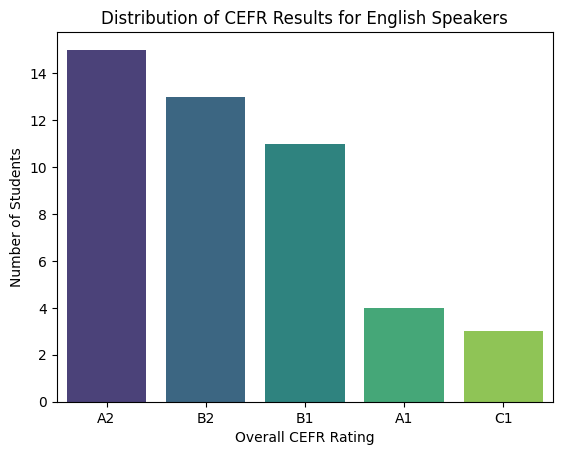

In [17]:
import matplotlib.pyplot as plt

# Filter for target language speakers to see if statistically relevant
english_speakers = df[df['Mother tongue'] == 'English']

# Count the distribution of CEFR results
cefr_counts = english_speakers['Overall CEFR rating'].value_counts()

# Create a bar plot
sns.barplot(x=cefr_counts.index, y=cefr_counts.values, palette='viridis')
plt.title('Distribution of CEFR Results for English Speakers')
plt.xlabel('Overall CEFR Rating')
plt.ylabel('Number of Students')
plt.show()

## Part 2: Data Tuning

Pre-processing and Data Engineering the data.

This cleaning of data does the following:
- Convert text to lowercase to ensure uniformity during feature extraction.
- Remove special characters, numbers, and extra whitespace to clean up the input text. (re.sub)
- Break down the text into individual words or tokens using NLTK's word_tokenize.
- Remove commonly used words that don't carry significant meaning, such as "and," "is," "the."  NOTE: This may be altered for this list in particular after reading the data.
- Stemming & Lemming
- STEMMING: reduces words to their base or root form by chopping off suffixes (e.g., "running" → "run").
- LEMMING: returns the dictionary form of a word, considering its context and grammar (e.g., "better" → "good").

In [24]:
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# Load DataFrame
df = pd.read_csv('trainingParsed.csv')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for text cleaning -- turn on or off stemming/lemming
def clean_text(text, apply_stemming=False, apply_lemmatization=False):
    if not isinstance(text, str):
        return text 

    # Lowercase the text
    text = text.lower()

    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zäöüß\s]', '', text)  # Retain only letters and German-specific characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords 
    stop_words = set(stopwords.words('german'))  
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming or lemmatization
    if apply_stemming:
        tokens = [stemmer.stem(word) for word in tokens]
    elif apply_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply text cleaning to the 'Learner text' column
df['cleaned_text'] = df['Learner text'].apply(lambda x: clean_text(x, apply_stemming=False, apply_lemmatization=False))

# Preview the cleaned text
print(df[['Learner text', 'cleaned_text']].head())


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/vscode/nltk_data'
    - '/usr/local/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
